# GridWorld Capture the Flag MVP Environment

In [1]:
from gridworld_ctf_mvp import GridworldCtf
from dqn_agent import DQNAgent
from dqn_network import DQNNetwork
from dueling_dqn_network import DuelingDQNNetwork
import numpy as np
import torch
from IPython.display import clear_output
from matplotlib import pyplot as plt
import utils as ut
import train_dqn as tdqn

# Check devices
print(f"mps available: {torch.backends.mps.is_available()}")
print(f"mps built: {torch.backends.mps.is_built()}")
print(f"cuda available: {torch.cuda.is_available()}")

mps available: False
mps built: False
cuda available: False


## MVP Environment

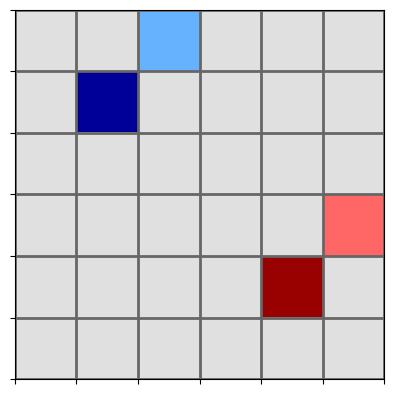

In [2]:
# instantiate environment
env = GridworldCtf(GAME_MODE='static',
                   GRID_LEN=6,
                   N_AGENTS=2)
env.render()

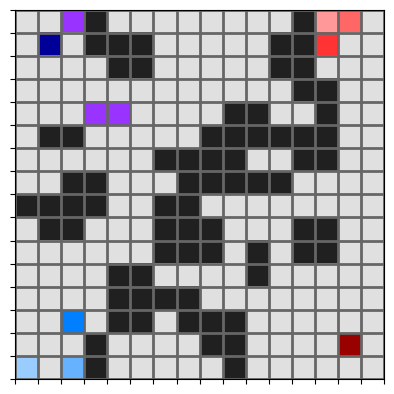

In [3]:
# instantiate environment
env = GridworldCtf(GAME_MODE='random',
                   GRID_LEN=16,
                   N_AGENTS=6,
                   ENABLE_PICKUPS=True,
                   ENABLE_OBSTACLES=True,
                   MAX_BLOCK_TILE_PCT=0.33,
                   MAX_HEALTH_PICKUP_TILES=3
                   )
env.render()

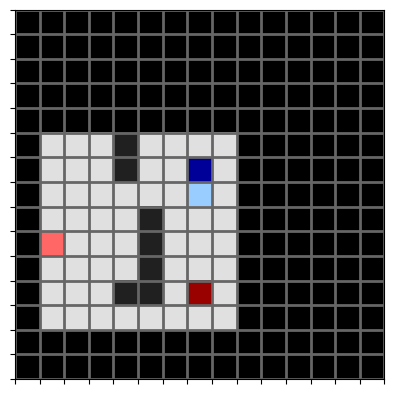

You win!, total score 263


In [5]:
# playing against random agents
env = GridworldCtf(GAME_MODE='random',
                   GRID_LEN=8,
                   N_AGENTS=2,
                   ENABLE_OBSTACLES=True,
                   AGENT_CONFIG = {
                        0: {'team':0, 'type':2},
                        1: {'team':1, 'type':0},
                        2: {'team':0, 'type':1},
                        3: {'team':1, 'type':1},
                        4: {'team':0, 'type':2},
                        5: {'team':1, 'type':2}
                    }
                   )
env.play(player=0, render_ego_state=True)


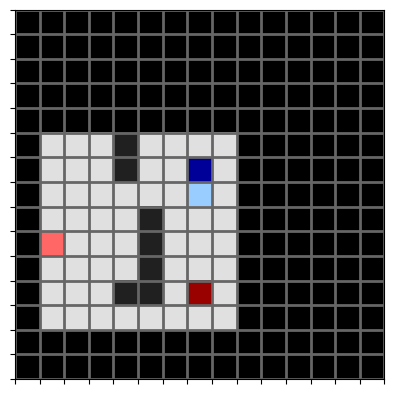

In [6]:
env.render(ego_state_agent=0)

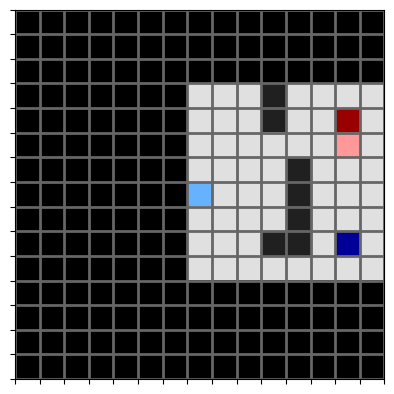

In [7]:
env.render(ego_state_agent=1)

## Deep Q-Network

### Train agents - Flag carriers only

In [8]:
# create environment
env = GridworldCtf(GAME_MODE='static',
                   GRID_LEN=7,
                   N_AGENTS=4)
device = "cpu"

# configure agents
n_actions = 8
n_channels = 1
batch_size = 32
gamma = 0.9
lr = 0.00005
epsilon = 1.0
target_update_steps = 1000
mem_size = 40000
use_softmax = True
loss = 'mse'

agent_t1 = DQNAgent(name='dqn_t1',
                    grid_len=env.GRID_LEN,
                    n_actions=n_actions,
                    n_channels=n_channels,
                    batch_size=batch_size,
                    gamma=gamma,
                    lr=lr,
                    epsilon=epsilon,
                    target_update_steps=target_update_steps,
                    mem_size=mem_size,
                    use_softmax=use_softmax,
                    loss=loss,
                    device=device)

agent_t2 = DQNAgent(name='dqn_t2',
                    grid_len=env.GRID_LEN,
                    n_actions=n_actions,
                    n_channels=n_channels,
                    batch_size=batch_size,
                    gamma=gamma,
                    lr=lr,
                    epsilon=epsilon,
                    target_update_steps=target_update_steps,
                    mem_size=mem_size,
                    use_softmax=use_softmax,
                    loss=loss,
                    device=device)

# train agents
training_metrics = tdqn.train_dqn(env,
                                agent_t1,
                                agent_t2,
                                epochs=500,
                                batch_size=batch_size,
                                epsilon=epsilon,
                                epsilon_decay=0.999,
                                epsilon_min=0.1,
                                n_random_steps=0,
                                max_steps=1000,
                                learning_skip_steps=1,
                                use_ego_state=False,
                                scale_tiles=False,
                                device=device)

episode: 161                 
total step count: 44049                 
episode step count: 214                 
score: -356                 
average score: -497.56                 
epsilon: 0.8521                 
done count: 161                 
team 1 captures: 432                 
team 2 captures: 265


In [17]:
# Save models
agent_t1.save_model()
agent_t2.save_model()

#### Performance metrics

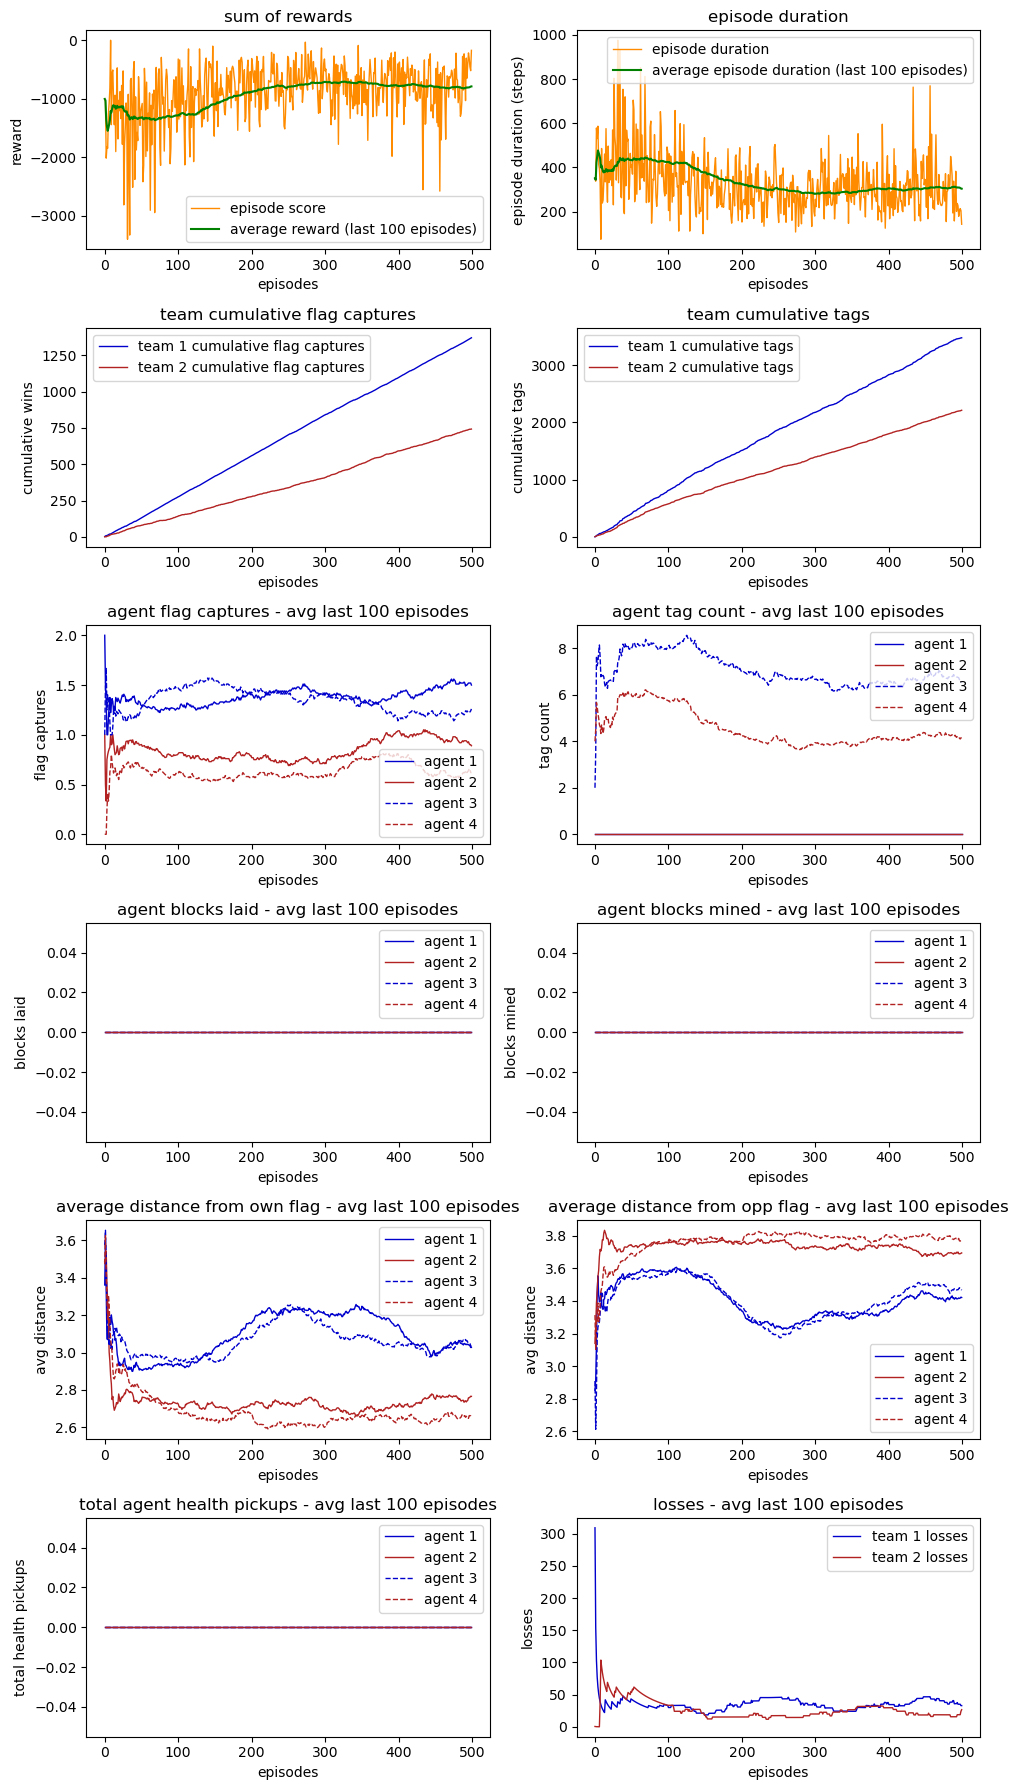

In [8]:
ut.plot_training_performance(training_metrics)

#### Inference

In [8]:
# create agents
use_softmax = True
agent_t1 = DQNAgent(name='dqn_t1',
                      use_softmax=use_softmax)

agent_t2 = DQNAgent(name='dqn_t2',
                      use_softmax=use_softmax)


In [17]:
# create environment
env = GridworldCtf(GAME_MODE='static',
                   GRID_LEN=6,
                   N_AGENTS=2)
                   

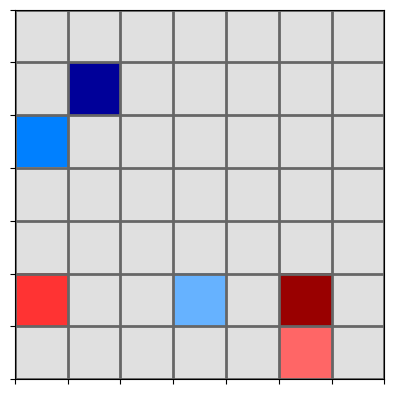

Move limit reached.                       
Final score: -304                       
Team 1 score: 0                       
Team 2 score: 1                       
Total moves: 101


In [5]:
# test model
# env_dims = (1, 1, 6, 6)
ut.test_model(env, 
             agent_t1, 
             agent_t2, 
             display=True, 
             max_moves=100,
             use_ego_state=False,
             scale_tiles=False)

### Train with standardised state

In [8]:
# create environment
env = GridworldCtf(GAME_MODE='static',
                   GRID_LEN=7,
                   N_AGENTS=4)
device = "cpu"

# configure agents
n_actions = 8
n_channels = 1
batch_size = 32
gamma = 0.9
lr = 0.00005
epsilon = 1.0
target_update_steps = 1000
mem_size = 40000
use_softmax = True
loss = 'mse'

agent_t1 = DQNAgent(name='dqn_t1',
                    grid_len=env.EGO_GRID_LEN,
                    n_actions=n_actions,
                    n_channels=n_channels,
                    batch_size=batch_size,
                    gamma=gamma,
                    lr=lr,
                    epsilon=epsilon,
                    target_update_steps=target_update_steps,
                    mem_size=mem_size,
                    use_softmax=use_softmax,
                    loss=loss,
                    device=device)

agent_t2 = DQNAgent(name='dqn_t2',
                    grid_len=env.EGO_GRID_LEN,
                    n_actions=n_actions,
                    n_channels=n_channels,
                    batch_size=batch_size,
                    gamma=gamma,
                    lr=lr,
                    epsilon=epsilon,
                    target_update_steps=target_update_steps,
                    mem_size=mem_size,
                    use_softmax=use_softmax,
                    loss=loss,
                    device=device)

# train agents
training_metrics = tdqn.train_dqn(env,
                                agent_t1,
                                agent_t2,
                                epochs=500,
                                batch_size=batch_size,
                                epsilon=epsilon,
                                epsilon_decay=0.999,
                                epsilon_min=0.1,
                                n_random_steps=0,
                                max_steps=1000,
                                learning_skip_steps=1,
                                use_ego_state=True,
                                scale_tiles=False,
                                device=device)

episode: 496                 
total step count: 297171                 
episode step count: 583                 
score: -1932                 
average score: -2324.96                 
epsilon: 0.6094                 
done count: 389                 
team 1 captures: 568                 
team 2 captures: 1199


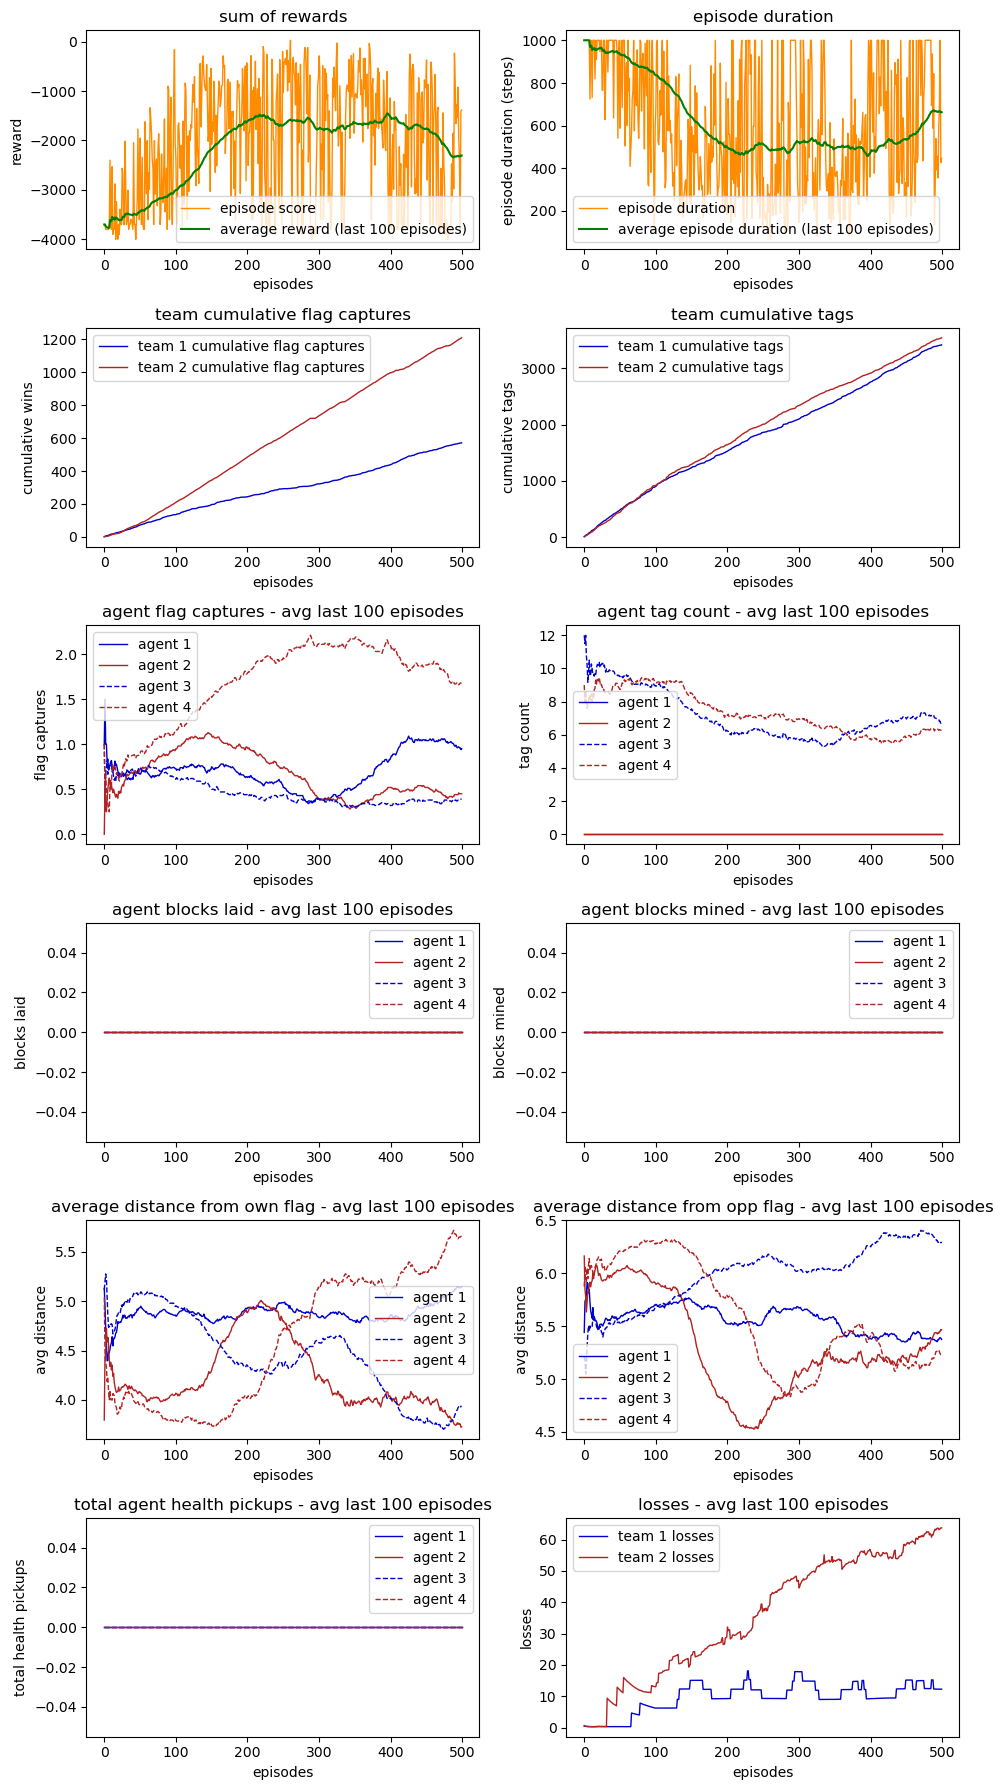

In [9]:
ut.plot_training_performance(training_metrics)

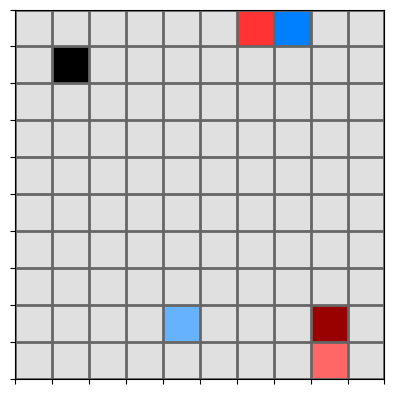

Move limit reached.                       
Final score: -404                       
Team 1 score: 0                       
Team 2 score: 0                       
Total moves: 101


In [10]:
ut.test_model(env, 
             agent_t1, 
             agent_t2, 
             display=True, 
             max_moves=100,
             use_standardised_state=True)

#### Interactive play with trained agents

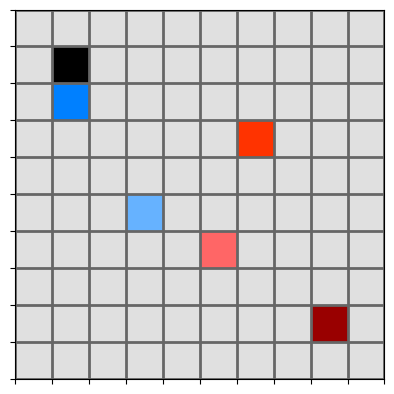

You win!, total score 141


In [12]:
env = GridworldCtf(game_mode='static')
env.play(player=0, agents=agents)